In [6]:
#Import librairies

import os
import pandas as pd
import numpy as np
import prepare_data

import nilearn as nl
from nilearn import plotting as nlp
from nilearn import datasets
from nilearn import image
from nilearn.image import load_img
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans

In [7]:
output_dir = "/home/ubuntu/nai/"

In [8]:
abide = datasets.fetch_abide_pcp(data_dir="/home/ubuntu/nai",
                                 pipeline="cpac",
                                 quality_checked=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [9]:
feat_file = os.path.join(output_dir, 'ABIDE_BASC064_features.npz')
X_features = np.load(feat_file)['a']

In [10]:
X_features.shape

(871, 2016)

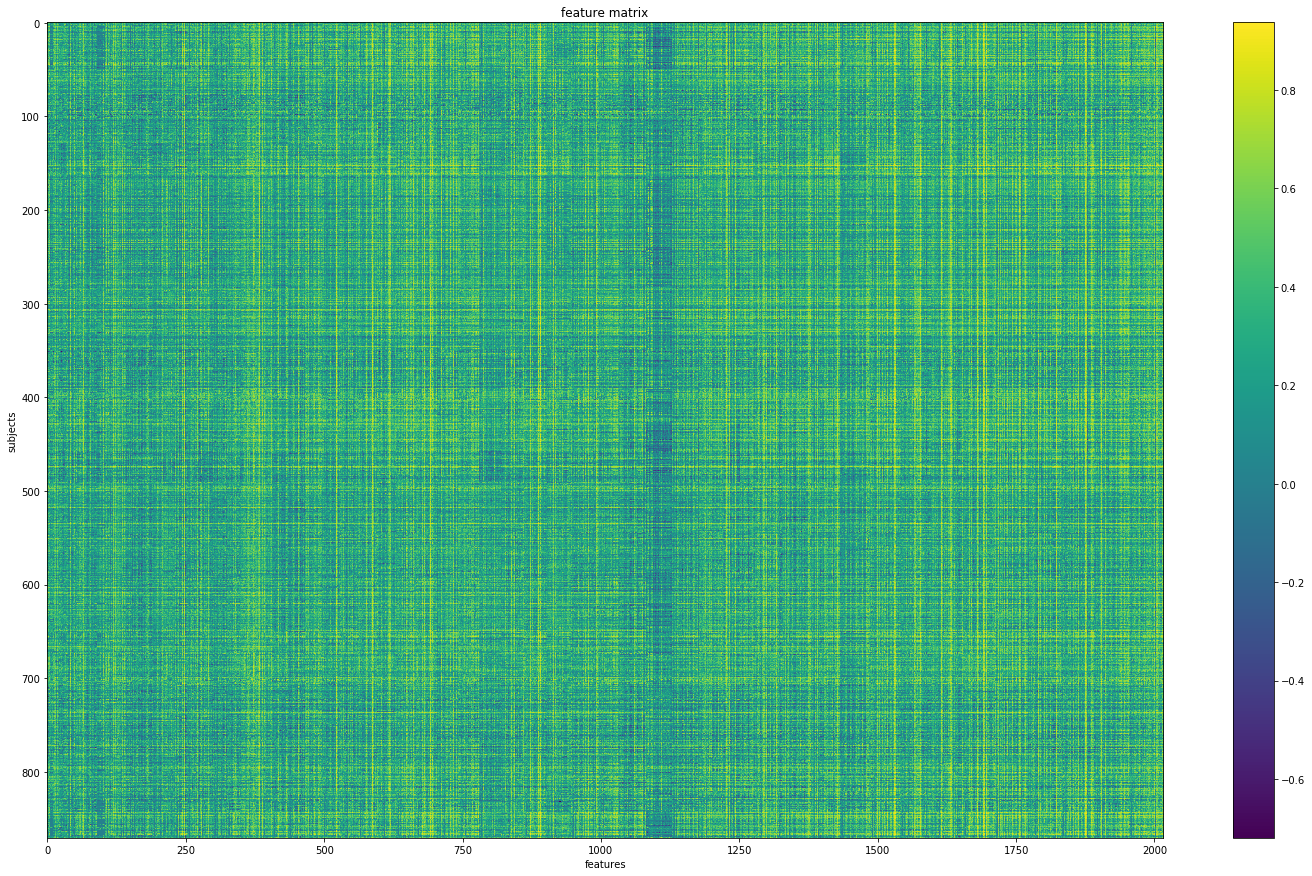

In [11]:
#Plot feature matrix

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

In [12]:
#Define functions to compute accuracy mean and std 

def compute_acc_std_mean (train_scores, test_scores):
    #train scores
    train_scores_mean= np.mean(train_scores, axis=1)
    train_scores_std= np.std(train_scores, axis=1)
    
    #test scores
    test_scores_mean= np.mean(test_scores, axis=1)
    test_scores_std= np.std(test_scores, axis=1)
    
    return train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

In [29]:
#Define function to plot validation curve

def plot_validationcurve (param, param_range, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std):
    plt.title("Validation Curve",fontsize=30)
    plt.xlabel("Hyperparameter : {}".format(param), fontsize=30)
    plt.ylabel("Score:  Accuracy", fontsize=30)
    plt.ylim(0.4, 1.1)
    lw=2
    #plot train scores
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    
    #plot test scores
    plt.semilogx(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    
    plt.legend(loc="best",fontsize=20)
    plt.gcf().set_size_inches(25, 15)
    
    return plt.show()

In [14]:
# Function returning the best estimator

def best_estimator(model, param_grid, X, y, cv):
    grid = GridSearchCV (model, param_grid, cv=cv)
    grid.fit(X, y)
    model_best= grid.best_estimator_
    param_best= grid.best_params_
    
    return model_best , param_best

In [15]:
#Get target vector
y_target=abide.phenotypic["DX_GROUP"]

In [16]:
model_SVC = SVC()

In [17]:
#plot validation curve for gamma parameter
param_range_SVM= np.logspace (-6, 2 , 20)

train_scores_SVM, test_scores_SVM= validation_curve(
    SVC(), X_features, y_target, param_name="gamma", param_range=param_range_SVM,
    scoring="accuracy", n_jobs=1)

In [18]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std= compute_acc_std_mean (train_scores_SVM, test_scores_SVM)

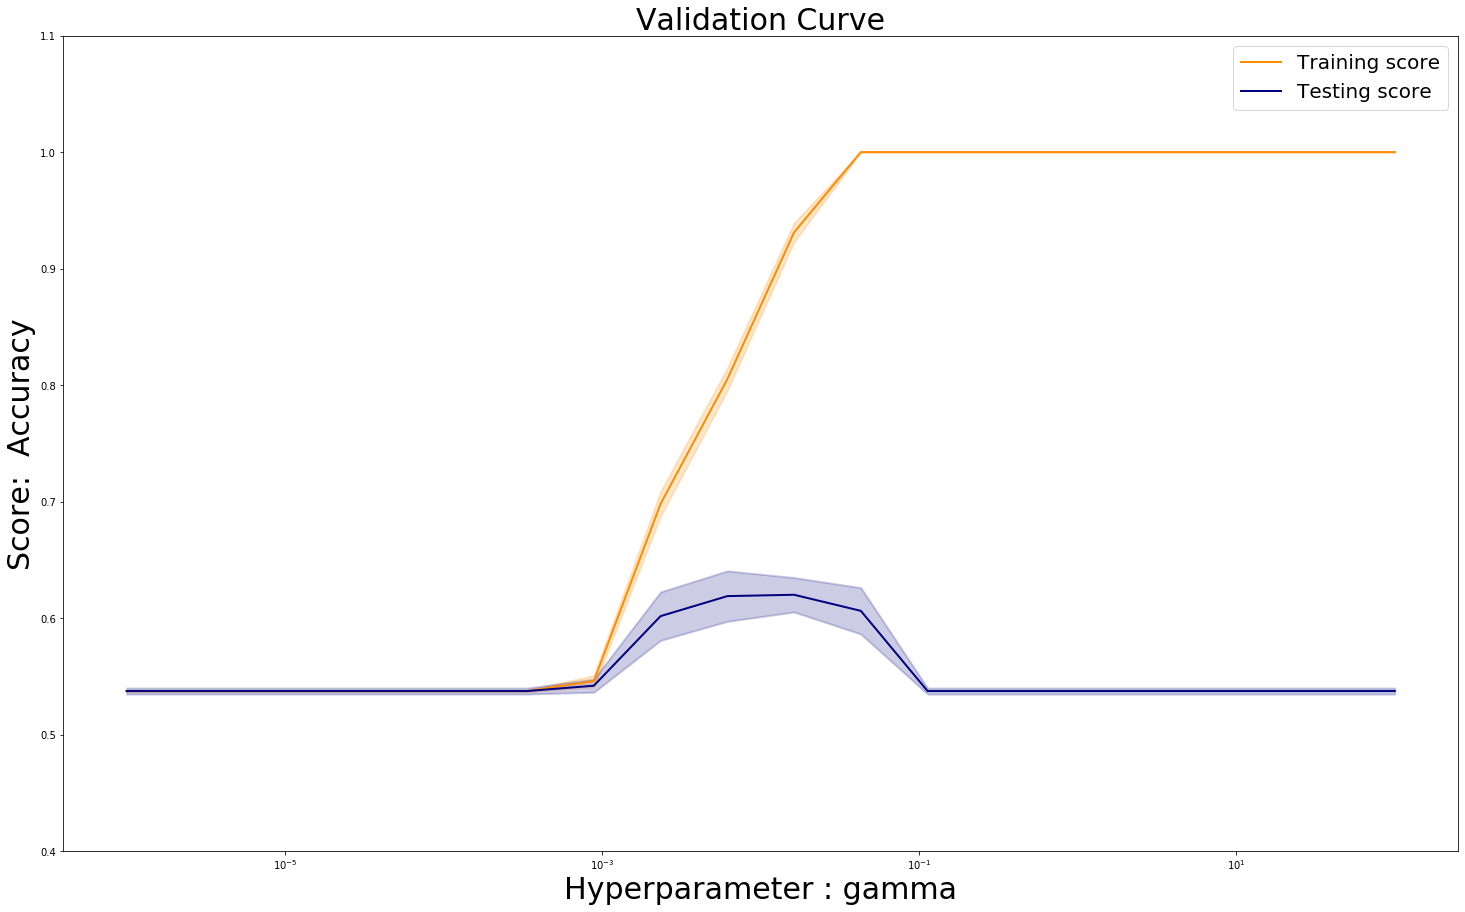

In [30]:
plot_validationcurve("gamma", param_range_SVM, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std)

In [20]:
train_scores_C, test_scores_C= validation_curve(
    SVC(), X_features, y_target, param_name="C", param_range=param_range_SVM,
    scoring="accuracy", n_jobs=1)

In [16]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std= compute_acc_std_mean (train_scores_C, test_scores_C)

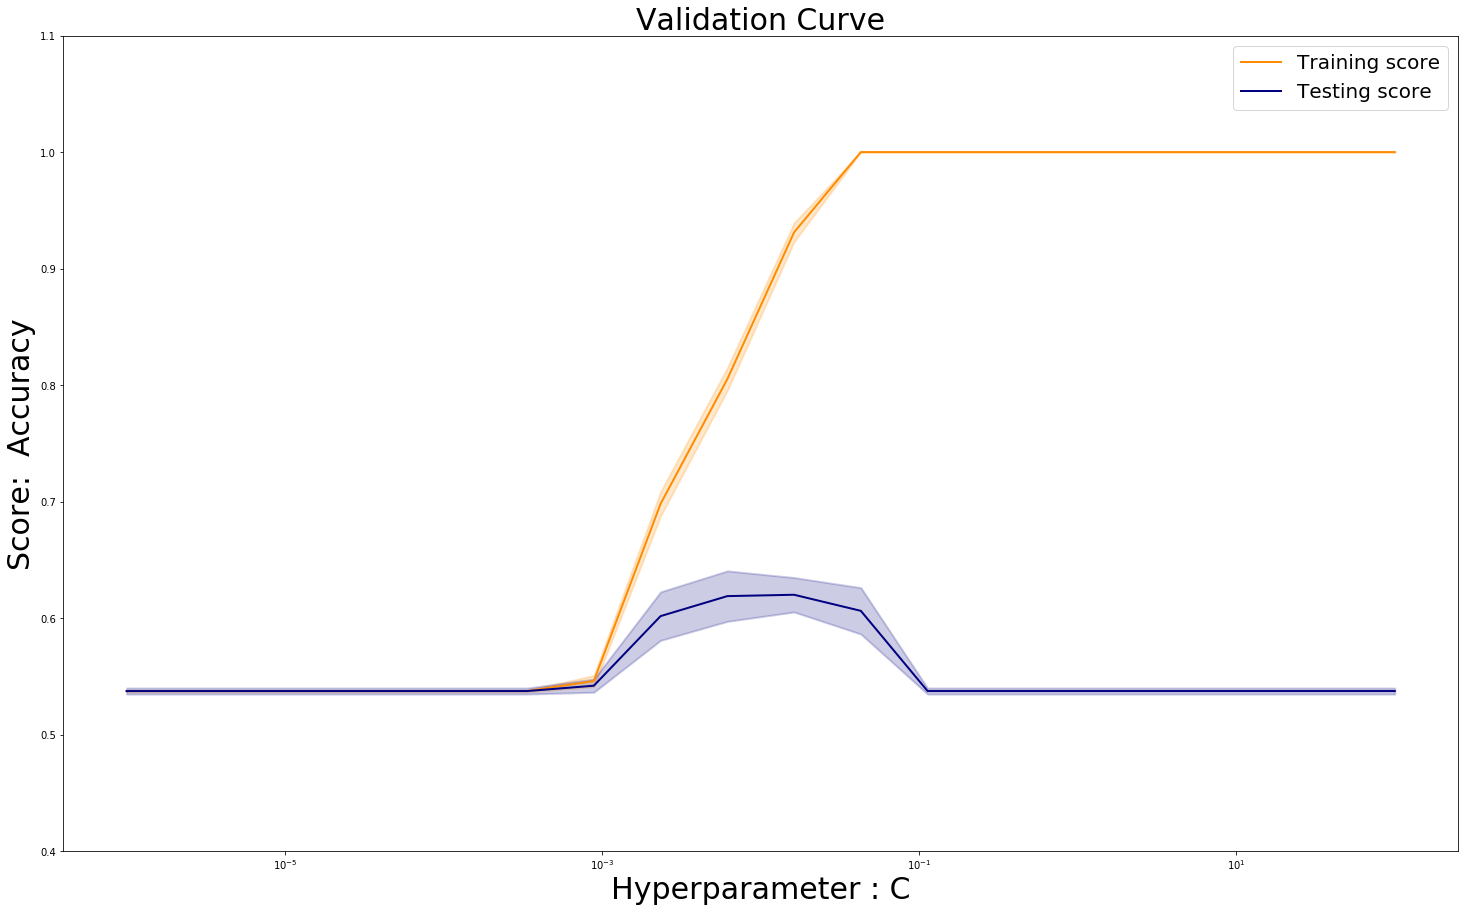

In [31]:
#plot validation curve for c hyperparameter
plot_validationcurve("C", param_range_SVM, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std)

In [ ]:

#Find best estimator 

param_grid_SVC = {'C': [0.01, 0.1, 1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4,  5, 10],
              'gamma': [0.00001, 0.00005,  0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2, 3.5, 5, 10]}

best_estimator(model_SVC, param_grid_SVC, X_features, y_target, 10)

In [48]:
from sklearn.svm import LinearSVC
param_grid_SVC = {'C': [0.01, 0.1, 1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4,  5, 10]}

best_estimator(LinearSVC(max_iter=10000), param_grid_SVC, X_features, y_target, 10)

(LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=10000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 {'C': 0.01})